In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.homework2.knn_classifier import KNNClassifier
from src.homework2.processing import MaxAbsScaler, MetricCalculator, MinMaxScaler, StandardScaler, train_test_split

In [47]:
spam_df = pd.read_csv("/content/drive/MyDrive/spbu_ml_sem4/notebooks/spam.csv")
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [48]:
y = spam_df["label"].values
X = spam_df.drop(columns=["label"]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 0.2, stratify=True)

In [49]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([1895, 1231]))
(array([0, 1]), array([474, 309]))
(array([0, 1]), array([419, 273]))


In [50]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
max_abs_scaler = MaxAbsScaler()

In [51]:
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_val_standard_scaled = standard_scaler.transform(X_val)
X_test_standard_scaled = standard_scaler.transform(X_test)

X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)
X_val_min_max_scaled = min_max_scaler.transform(X_val)
X_test_min_max_scaled = min_max_scaler.transform(X_test)

X_train_max_abs_scaled = max_abs_scaler.fit_transform(X_train)
X_val_max_abs_scaled = max_abs_scaler.transform(X_val)
X_test_max_abs_scaled = max_abs_scaler.transform(X_test)

In [52]:
def get_metrics_for_k(min_k, max_k, leaf_size, X_train, y_train, X_test, y_test, metric):
    accuracy = []
    f1_score = []
    knn = KNNClassifier(1, leaf_size, metric=metric)
    knn.fit(X_train, y_train)
    for k in range(min_k, max_k + 1):
        knn.k = k
        y_pred = knn.predict(X_test)
        metric_calculator = MetricCalculator(y_pred, y_test)
        accuracy.append(metric_calculator.calculate_accuracy())
        f1_score.append(metric_calculator.calculate_f1_score())
    return accuracy, f1_score

In [61]:
def draw_dependence_metrics_on_k(accuracy, f1_score, file_name):
    k_values = np.arange(1, len(accuracy) + 1)
    plt.figure(figsize=(15, 8))

    plt.style.use("seaborn-v0_8-white")
    plt.rcParams["font.size"] = 12

    ax = plt.gca()
    line1 = ax.plot(k_values, accuracy, marker="o", markersize=8, linewidth=2.5, color="#2c7bb6", label="Accuracy")
    line2 = ax.plot(k_values, f1_score, marker="s", markersize=8, linewidth=2.5, color="#d7191c", label="F1-score")

    plt.xticks(np.arange(0, len(accuracy) + 1, 5), fontsize=12)
    plt.yticks(np.arange(0.7, 1, 0.05), fontsize=12)
    plt.xlabel("Значение k", fontsize=14, labelpad=12)
    plt.ylabel("Метрика", fontsize=14, labelpad=12)
    plt.title("Зависимость Accuracy и F1-score от k", fontsize=16, pad=20, fontweight="bold")

    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True, fontsize=12)
    plt.grid(True, alpha=0.4, linestyle="--")

    ax.spines[["top", "right"]].set_visible(False)

    plt.savefig(file_name, dpi=300, bbox_inches="tight")

    plt.show()

In [54]:
def print_best_n_metrics(scaler_name, accuracy, f1_score, n):
    accuracy = np.array(accuracy)
    f1_score = np.array(f1_score)
    sorted_accuracy_indices = np.argsort(accuracy)[-n:][::-1]
    sorted_f1_indices = np.argsort(f1_score)[-n:][::-1]

    best_k_accuracy = sorted_accuracy_indices + 1
    best_k_f1 = sorted_f1_indices + 1

    sorted_accuracy_values = accuracy[sorted_accuracy_indices]
    sorted_f1_values = f1_score[sorted_f1_indices]

    print(f"\nЛучшие {n} значений Accuracy и F1-score для скейлера: {scaler_name}\n")
    print(f"{'k (Acc)':<8} {'Accuracy':<10} {'k (F1)':<8} {'F1-score':<10}")
    print("-" * 40)

    for k_acc, acc, k_f1, f1 in zip(best_k_accuracy, sorted_accuracy_values, best_k_f1, sorted_f1_values):
        print(f"{k_acc:<8} {acc:<10.4f} {k_f1:<8} {f1:<10.4f}")

In [56]:
metrics = ["euclidean", "manhattan", "cosine"]
results = dict()
for metric in metrics:
    spam_standard_accuracy, spam_standard_f1_score = get_metrics_for_k(
        1, 60, 60, X_train_standard_scaled, y_train, X_val_standard_scaled, y_val, metric
    )
    spam_min_max_accuracy, spam_min_max_f1_score = get_metrics_for_k(
        1, 60, 60, X_train_min_max_scaled, y_train, X_val_min_max_scaled, y_val, metric
    )
    spam_max_abs_accuracy, spam_max_abs_f1_score = get_metrics_for_k(
        1, 60, 60, X_train_max_abs_scaled, y_train, X_val_max_abs_scaled, y_val, metric
    )
    results[f"spam_{metric}_standard_accuracy"] = spam_standard_accuracy
    results[f"spam_{metric}_standard_f1_score"] = spam_standard_f1_score
    results[f"spam_{metric}_min_max_accuracy"] = spam_min_max_accuracy
    results[f"spam_{metric}_min_max_f1_score"] = spam_min_max_f1_score
    results[f"spam_{metric}_max_abs_accuracy"] = spam_max_abs_accuracy
    results[f"spam_{metric}_max_abs_f1_score"] = spam_max_abs_f1_score

    print(f"Scores for {metric} metric")
    print_best_n_metrics("StandardScaler", spam_standard_accuracy, spam_standard_f1_score, 5)
    print_best_n_metrics("MinMaxScaler", spam_min_max_accuracy, spam_min_max_f1_score, 5)
    print_best_n_metrics("MaxAbsScaler", spam_max_abs_accuracy, spam_max_abs_f1_score, 5)

Scores for euclidean metric

Лучшие 5 значений Accuracy и F1-score для скейлера: StandardScaler

k (Acc)  Accuracy   k (F1)   F1-score  
----------------------------------------
57       0.8902     3        0.8590    
41       0.8889     57       0.8576    
45       0.8876     41       0.8562    
46       0.8876     36       0.8543    
10       0.8876     45       0.8543    

Лучшие 5 значений Accuracy и F1-score для скейлера: MinMaxScaler

k (Acc)  Accuracy   k (F1)   F1-score  
----------------------------------------
13       0.8748     13       0.8429    
15       0.8736     15       0.8406    
17       0.8736     17       0.8390    
18       0.8710     45       0.8336    
45       0.8710     18       0.8336    

Лучшие 5 значений Accuracy и F1-score для скейлера: MaxAbsScaler

k (Acc)  Accuracy   k (F1)   F1-score  
----------------------------------------
13       0.8748     13       0.8429    
15       0.8736     15       0.8406    
17       0.8736     17       0.8390    
18    

/content/drive/MyDrive/spbu_ml_sem4/src/homework2/kd_tree.py:83: RuntimeWarning: invalid value encountered in scalar divide
  "cosine": lambda a, b: 1 - np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)),


Scores for cosine metric

Лучшие 5 значений Accuracy и F1-score для скейлера: StandardScaler

k (Acc)  Accuracy   k (F1)   F1-score  
----------------------------------------
7        0.8914     7        0.8600    
8        0.8902     8        0.8557    
10       0.8889     10       0.8543    
9        0.8863     9        0.8524    
45       0.8838     5        0.8520    

Лучшие 5 значений Accuracy и F1-score для скейлера: MinMaxScaler

k (Acc)  Accuracy   k (F1)   F1-score  
----------------------------------------
8        0.8633     12       0.8304    
12       0.8633     8        0.8293    
4        0.8621     10       0.8280    
10       0.8621     14       0.8273    
14       0.8608     7        0.8270    

Лучшие 5 значений Accuracy и F1-score для скейлера: MaxAbsScaler

k (Acc)  Accuracy   k (F1)   F1-score  
----------------------------------------
4        0.8787     12       0.8505    
12       0.8761     4        0.8490    
10       0.8748     10       0.8478    
2        

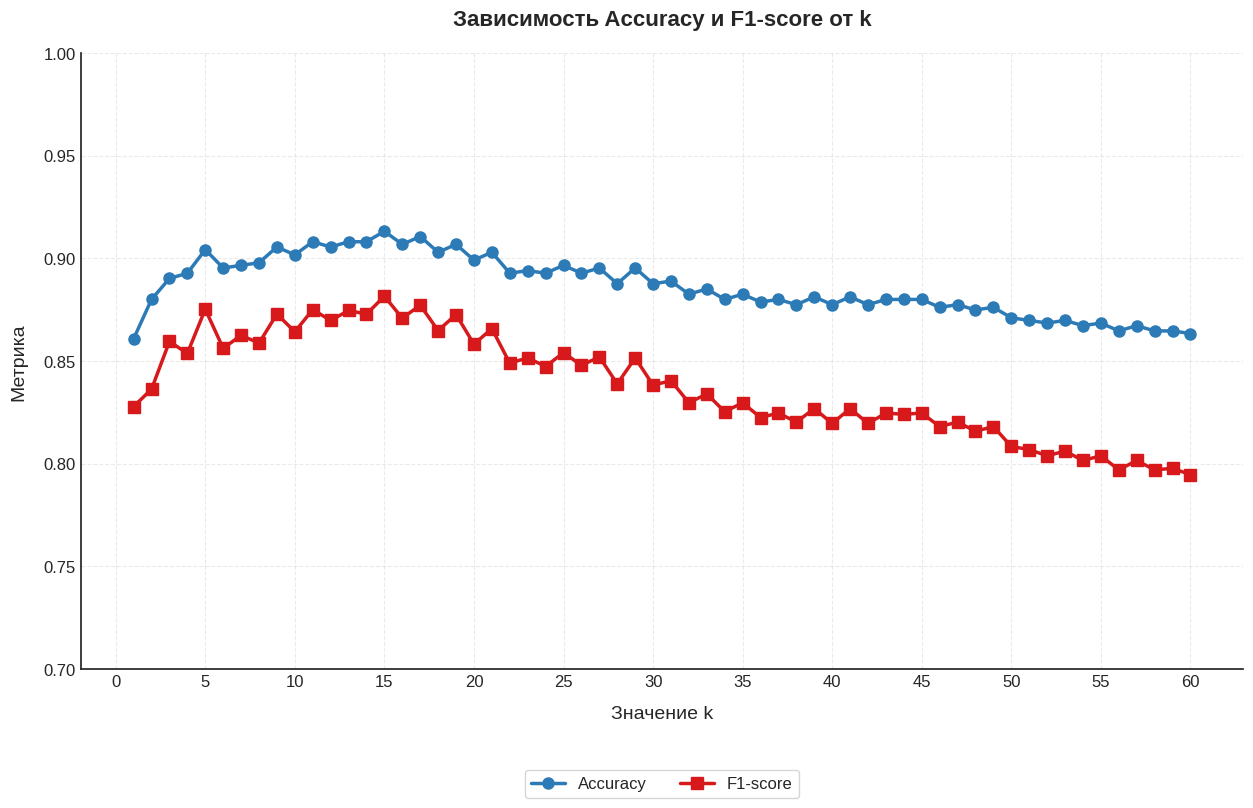

In [62]:
draw_dependence_metrics_on_k(
    results["spam_manhattan_standard_accuracy"], results["spam_manhattan_standard_f1_score"], "spam_result"
)

In [63]:
knn = KNNClassifier(15, 30, metric="manhattan")
knn.fit(X_train_standard_scaled, y_train)
y_pred = knn.predict(X_test_standard_scaled)
calculator = MetricCalculator(y_pred, y_test)
print(f"Accuracy on test data: {calculator.calculate_accuracy()}")
print(f"F1-score on test data: {calculator.calculate_f1_score()}")

Accuracy on test data: 0.8135838150289018
F1-score on test data: 0.7542857142857142


In [65]:
cancer_df = pd.read_csv("/content/drive/MyDrive/spbu_ml_sem4/notebooks/cancer.csv")
cancer_df.head()

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
cancer_df["label"] = cancer_df["label"].map({"M": 1, "B": 0}).astype(int)

In [67]:
y = cancer_df["label"].values
X = cancer_df.drop(columns=["label"]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 0.2, stratify=True)

In [68]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([242, 142]))
(array([0, 1]), array([61, 37]))
(array([0, 1]), array([54, 33]))


In [69]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
max_abs_scaler = MaxAbsScaler()

In [70]:
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_val_standard_scaled = standard_scaler.transform(X_val)
X_test_standard_scaled = standard_scaler.transform(X_test)

X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)
X_val_min_max_scaled = min_max_scaler.transform(X_val)
X_test_min_max_scaled = min_max_scaler.transform(X_test)

X_train_max_abs_scaled = max_abs_scaler.fit_transform(X_train)
X_val_max_abs_scaled = max_abs_scaler.transform(X_val)
X_test_max_abs_scaled = max_abs_scaler.transform(X_test)

In [73]:
metrics = ["euclidean", "manhattan", "cosine"]
results = dict()
for metric in metrics:
    cancer_standard_accuracy, cancer_standard_f1_score = get_metrics_for_k(
        1, 60, 60, X_train_standard_scaled, y_train, X_val_standard_scaled, y_val, metric
    )
    cancer_min_max_accuracy, cancer_min_max_f1_score = get_metrics_for_k(
        1, 60, 60, X_train_min_max_scaled, y_train, X_val_min_max_scaled, y_val, metric
    )
    cancer_max_abs_accuracy, cancer_max_abs_f1_score = get_metrics_for_k(
        1, 60, 60, X_train_max_abs_scaled, y_train, X_val_max_abs_scaled, y_val, metric
    )
    results[f"cancer_{metric}_standard_accuracy"] = cancer_standard_accuracy
    results[f"cancer_{metric}_standard_f1_score"] = cancer_standard_f1_score
    results[f"cancer_{metric}_min_max_accuracy"] = cancer_min_max_accuracy
    results[f"cancer_{metric}_min_max_f1_score"] = cancer_min_max_f1_score
    results[f"cancer_{metric}_max_abs_accuracy"] = cancer_max_abs_accuracy
    results[f"cancer_{metric}_max_abs_f1_score"] = cancer_max_abs_f1_score

    print(f"Scores for {metric} metric")
    print_best_n_metrics("StandardScaler", cancer_standard_accuracy, cancer_standard_f1_score, 5)
    print_best_n_metrics("MinMaxScaler", cancer_min_max_accuracy, cancer_min_max_f1_score, 5)
    print_best_n_metrics("MaxAbsScaler", cancer_max_abs_accuracy, cancer_max_abs_f1_score, 5)

Scores for euclidean metric

Лучшие 5 значений Accuracy и F1-score для скейлера: StandardScaler

k (Acc)  Accuracy   k (F1)   F1-score  
----------------------------------------
10       0.9796     10       0.9722    
13       0.9796     11       0.9722    
23       0.9796     23       0.9722    
25       0.9796     14       0.9722    
7        0.9796     13       0.9722    

Лучшие 5 значений Accuracy и F1-score для скейлера: MinMaxScaler

k (Acc)  Accuracy   k (F1)   F1-score  
----------------------------------------
30       0.9796     30       0.9722    
13       0.9796     13       0.9722    
33       0.9796     33       0.9722    
34       0.9796     34       0.9722    
35       0.9796     35       0.9722    

Лучшие 5 значений Accuracy и F1-score для скейлера: MaxAbsScaler

k (Acc)  Accuracy   k (F1)   F1-score  
----------------------------------------
30       0.9796     30       0.9722    
14       0.9796     15       0.9722    
27       0.9796     31       0.9722    
31    

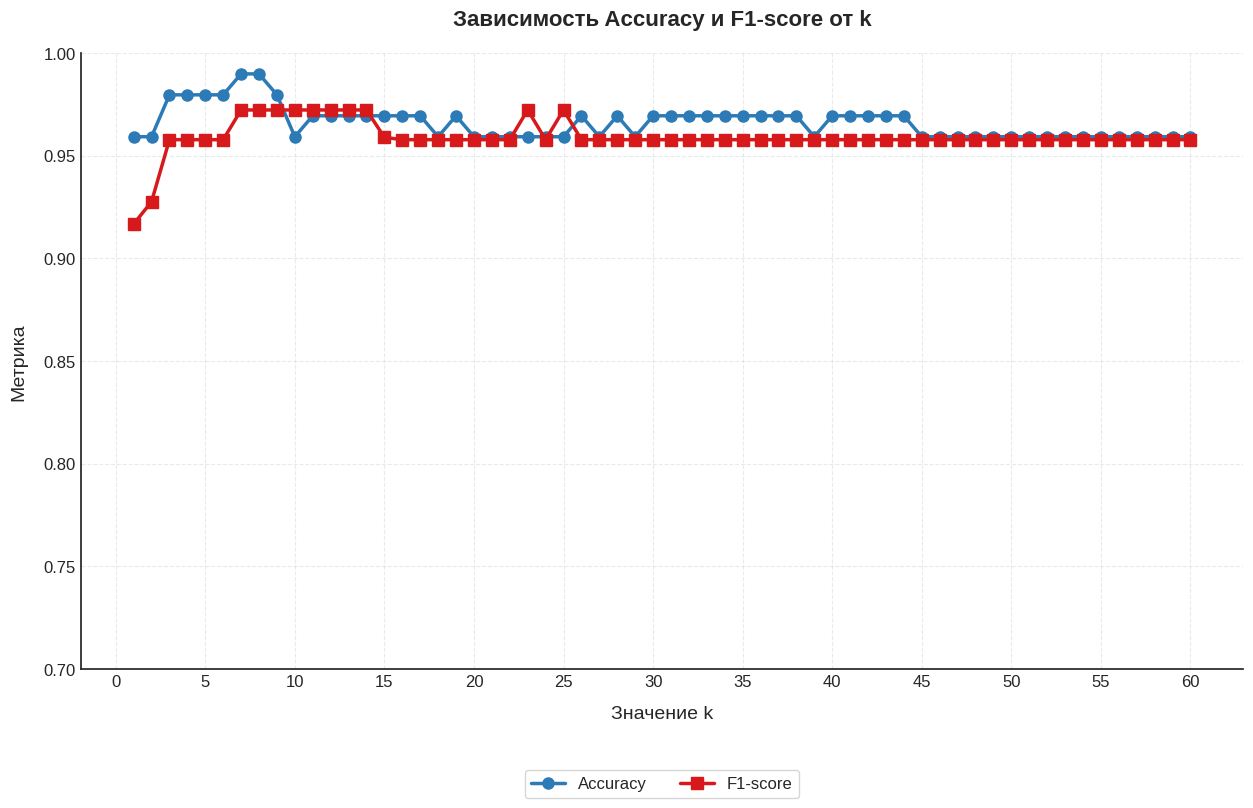

In [74]:
draw_dependence_metrics_on_k(
    results["cancer_manhattan_standard_accuracy"], results["cancer_euclidean_standard_f1_score"], "cancer_result"
)

In [77]:
knn = KNNClassifier(7, 30)
knn.fit(X_train_standard_scaled, y_train)
y_pred = knn.predict(X_test_standard_scaled)
calculator = MetricCalculator(y_pred, y_test)
print(calculator.calculate_accuracy())
print(calculator.calculate_f1_score())

0.9655172413793104
0.9565217391304348
